Import libraries

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import pandas as pd

import itertools
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

Read data

In [12]:
df = pd.read_csv("../data/student/student-por-percentiled.csv")

header = list(df)

Replace text with dummy variables

In [13]:
original = []
for attr in header:
    counts = df[attr].value_counts()
    original.append(counts.index.tolist())
    
    for i in range(len(df)):
        value = df.get_value(i, attr)
        new = counts.index.tolist().index(value)
        df.set_value(i, attr, new)

To calculate scores

In [14]:
def calcScores(X, y):
    dtc_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    dtc_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
    dtc_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    dtc_4 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
    dtc_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    dtc_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6)

    scoresAcc_1 = cross_val_score(dtc_1, X, y, cv=5, scoring='accuracy').mean()
    scoresAcc_2 = cross_val_score(dtc_2, X, y, cv=5, scoring='accuracy').mean()
    scoresAcc_3 = cross_val_score(dtc_3, X, y, cv=5, scoring='accuracy').mean()
    scoresAcc_4 = cross_val_score(dtc_4, X, y, cv=5, scoring='accuracy').mean()
    scoresAcc_5 = cross_val_score(dtc_5, X, y, cv=5, scoring='accuracy').mean()
    scoresAcc_6 = cross_val_score(dtc_6, X, y, cv=5, scoring='accuracy').mean()

    scoresAcc = [{1 : scoresAcc_1}, {2 : scoresAcc_2}, {3 : scoresAcc_3}, {4 : scoresAcc_4}, {5 : scoresAcc_5}, {6 : scoresAcc_6}]
    return scoresAcc

To plot confusion matrix

In [15]:
def rearrangeMatrix(matrix):
    matrix[:,[0, 1]] = matrix[:,[1, 0]]
    matrix[[0, 1], :] = matrix[[1, 0], :]

def plot_confusion_matrix(cm, classes=['yes', 'no'], title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Print and plot the confusion matrix. Normalization can be applied by setting `normalize=True`.
    """
    
    rearrangeMatrix(cm)
    
    fig = plt.figure(figsize=(12, 6))
    
    tick_marks = np.arange(len(classes))
    
    """
    Without Normalization
    """
    
    ax1 = fig.add_subplot(121)
    
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax1.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(im, cax = cax, orientation='vertical')
    
    ax1.set_title(title + ", without normalization")
    ax1.set_xticks(np.arange(len(classes)))
    ax1.set_xticklabels(classes)
    ax1.set_yticks(np.arange(len(classes)))
    ax1.set_yticklabels(classes)
    np.set_printoptions(precision=2)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = cm[i, j]
        ax1.annotate(val, xy=(j, i), ha="center", color="white" if val > thresh else "black")
        
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    
   
    """
    With Normalization
    """

    ax2 = fig.add_subplot(122)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax2.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(im, cax = cax, orientation='vertical')
    
    ax2.set_title(title + ", with normalization")
    ax2.set_xticks(np.arange(len(classes)))
    ax2.set_xticklabels(classes)
    ax2.set_yticks(np.arange(len(classes)))
    ax2.set_yticklabels(classes)
    np.set_printoptions(precision=2)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = round(cm[i, j], 2)
        ax2.annotate(val, xy=(j, i), ha="center", color="white" if val > thresh else "black")
        
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    
    plt.tight_layout()
    plt.show()

X data, always same

In [16]:
X = pd.DataFrame.copy(df.iloc[:, :-4]).astype(int)

y: Top 10

In [17]:
y = pd.DataFrame.copy(df.iloc[:, -4]).astype(int)
calcScores(X, y)

[{1: 0.9013953488372094},
 {2: 0.8998568872987478},
 {3: 0.9013953488372094},
 {4: 0.89831842576028631},
 {5: 0.88907573047107924},
 {6: 0.88907573047107924}]

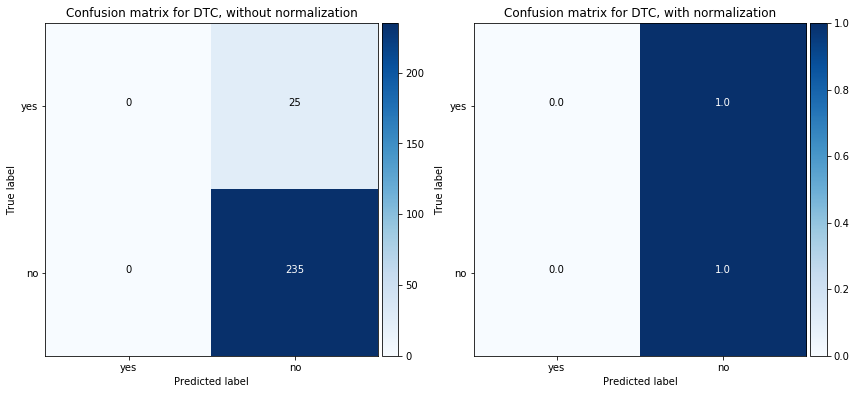

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dtc = dtc.fit(X_train, y_train)
tree.export_graphviz(dtc, out_file='../other/por-top10percent.dot')  
pred = dtc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(cnf_matrix, title='Confusion matrix for DTC')

y: Bottom 10

In [19]:
y = pd.DataFrame.copy(df.iloc[:, -3]).astype(int)
calcScores(X, y)

[{1: 0.85522957662492549},
 {2: 0.87215265354800242},
 {3: 0.87830649970184849},
 {4: 0.86908765652951703},
 {5: 0.876768038163387},
 {6: 0.87525342874180079}]

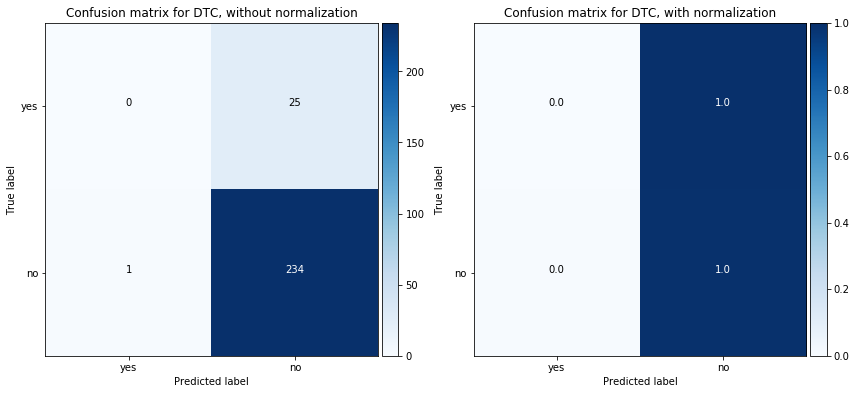

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc = dtc.fit(X_train, y_train)
tree.export_graphviz(dtc, out_file='../other/por-bottom10percent.dot')  
pred = dtc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(cnf_matrix, title='Confusion matrix for DTC')

y: Top 20

In [21]:
y = pd.DataFrame.copy(df.iloc[:, -2]).astype(int)
calcScores(X, y)

[{1: 0.80124031007751939},
 {2: 0.7997018485390579},
 {3: 0.7966249254621347},
 {4: 0.7966249254621347},
 {5: 0.75011329755515799},
 {6: 0.74714370900417415}]

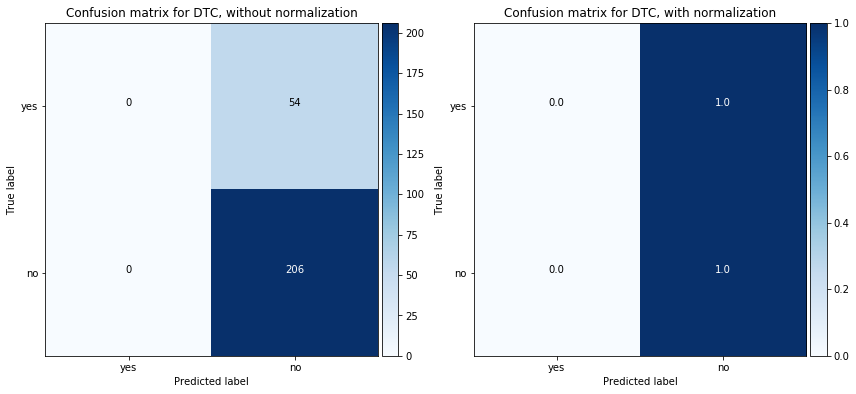

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dtc = dtc.fit(X_train, y_train)
tree.export_graphviz(dtc, out_file='../other/por-top20percent.dot')  
pred = dtc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(cnf_matrix, title='Confusion matrix for DTC')

y: Bottom 20

In [23]:
y = pd.DataFrame.copy(df.iloc[:, -1]).astype(int)
calcScores(X, y)

[{1: 0.82436493738819316},
 {2: 0.78590339892665484},
 {3: 0.82127608825283238},
 {4: 0.80128801431127017},
 {5: 0.81053070960047702},
 {6: 0.78590339892665473}]

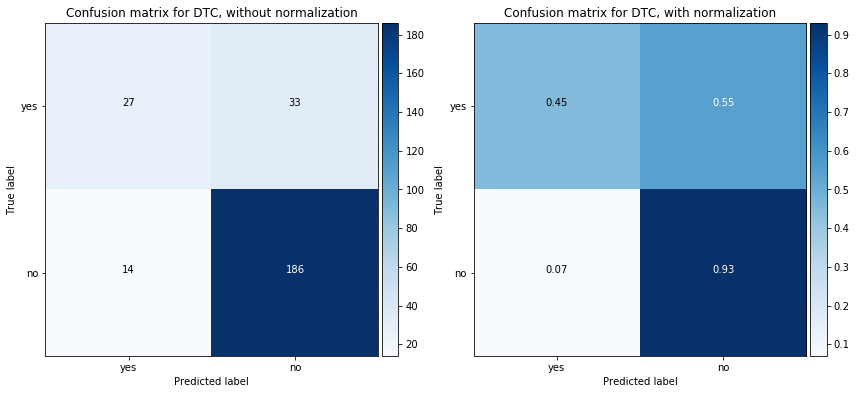

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dtc = dtc.fit(X_train, y_train)
tree.export_graphviz(dtc, out_file='../other/por-bottom20percent.dot')  
pred = dtc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(cnf_matrix, title='Confusion matrix for DTC')